## _VBM 661 - Veri Görselleştirme - Ara Sınav_
* Öğrenci Adı Soyadı:   Mert ÇALIŞKAN
* Öğrenci Numarası:     N22233552

### Veri Okuma

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

groundhogs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/groundhogs.csv'
predictions_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/predictions.csv'

df_groundhogs = pd.read_csv(groundhogs_url)
df_predictions = pd.read_csv(predictions_url)

### Veri Analizi

In [142]:
df_groundhogs.info()
df_predictions.info()

df_groundhogs.describe()
df_predictions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  75 non-null     int64  
 1   slug                75 non-null     object 
 2   shortname           75 non-null     object 
 3   name                75 non-null     object 
 4   city                75 non-null     object 
 5   region              75 non-null     object 
 6   country             75 non-null     object 
 7   latitude            75 non-null     float64
 8   longitude           75 non-null     float64
 9   source              75 non-null     object 
 10  current_prediction  71 non-null     object 
 11  is_groundhog        75 non-null     bool   
 12  type                75 non-null     object 
 13  active              75 non-null     bool   
 14  description         75 non-null     object 
 15  image               75 non-null     object 
 16  prediction

,id,year
count,1462.000000,1462.000000
mean,20.274282,2001.989056
std,18.469188,25.517395
min,1.000000,1886.000000
25%,5.000000,1996.250000
50%,14.000000,2011.000000
75%,32.000000,2018.000000
max,75.000000,2023.000000


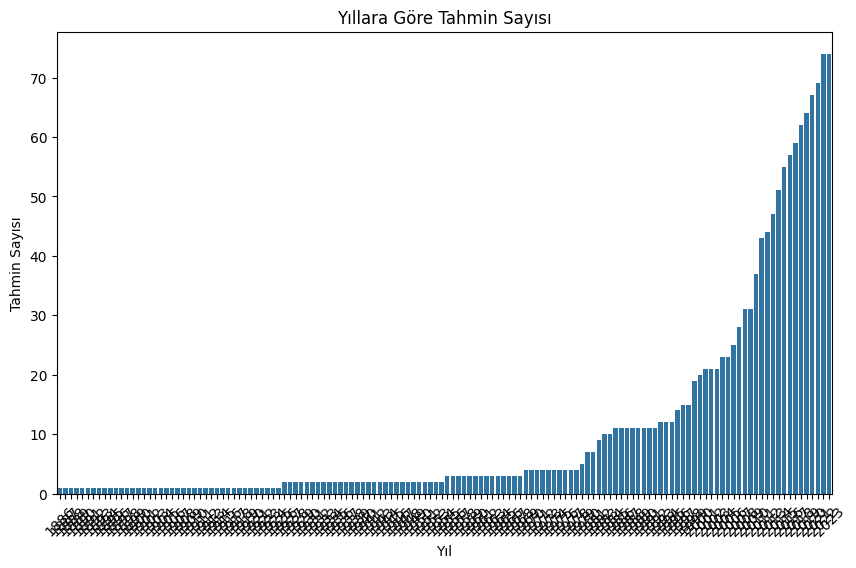

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# İki veri setini birleştirin
merged_data = pd.merge(df_groundhogs, df_predictions, on="id")

# Örnek görselleştirme: Yıllara göre tahmin sayısının görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.countplot(x="year", data=df_predictions)
plt.title("Yıllara Göre Tahmin Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Tahmin Sayısı")
plt.xticks(rotation=45)
plt.show()

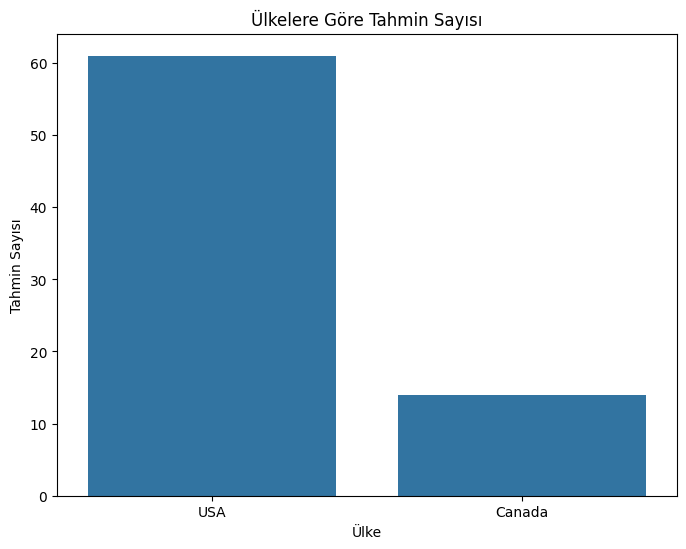

In [144]:
# Örnek görselleştirme: Ülkelere göre tahmin sayısının görselleştirilmesi
plt.figure(figsize=(8, 6))
sns.countplot(x="country", data=df_groundhogs)
plt.title("Ülkelere Göre Tahmin Sayısı")
plt.xlabel("Ülke")
plt.ylabel("Tahmin Sayısı")
plt.show()

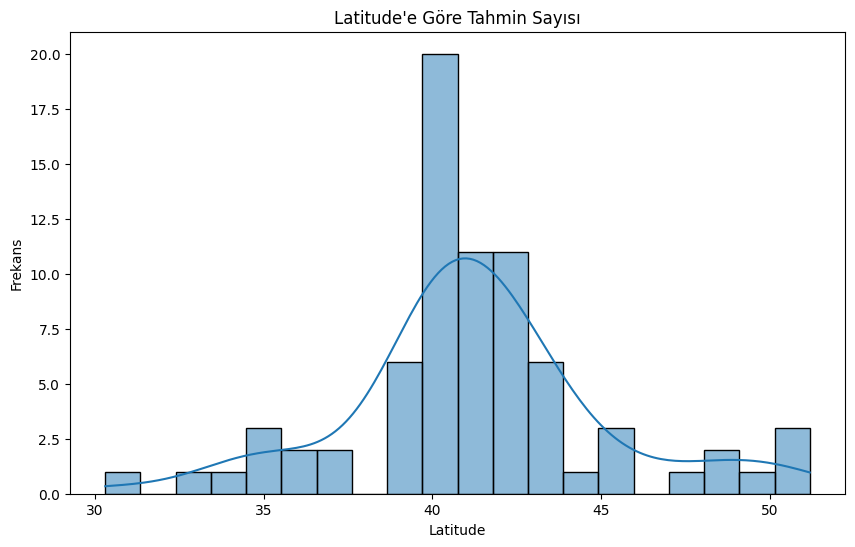

In [145]:
# Örnek görselleştirme: Latitude'e göre tahmin sayısının görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.histplot(x="latitude", data=df_groundhogs, bins=20, kde=True)
plt.title("Latitude'e Göre Tahmin Sayısı")
plt.xlabel("Latitude")
plt.ylabel("Frekans")
plt.show()

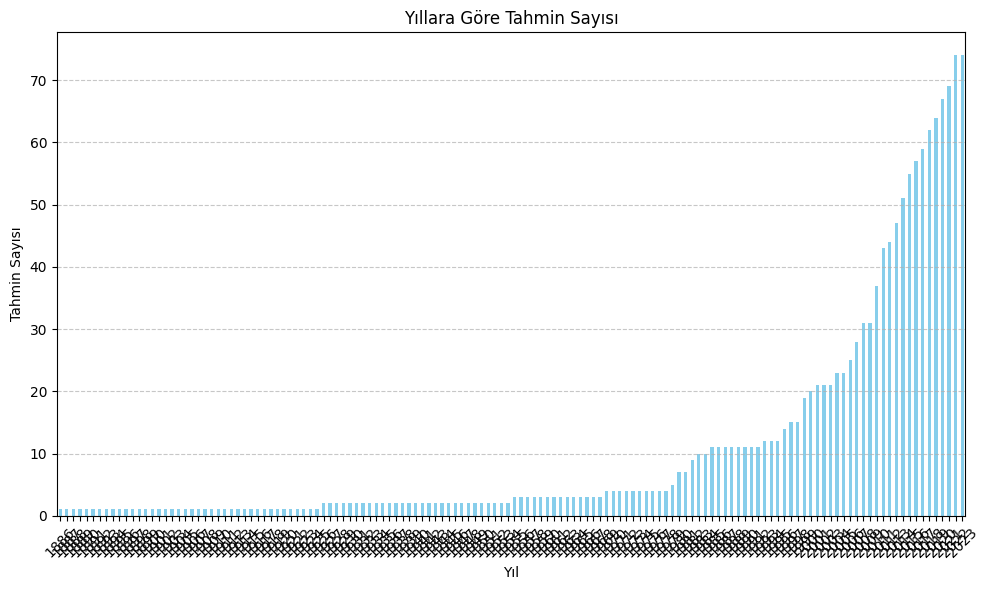

In [146]:
# Yıllara göre tahmin sayısını hesaplama
prediction_count_by_year = df_predictions.groupby('year').size()

# Tahmin sayısının zaman içindeki değişimini görselleştirme
plt.figure(figsize=(10, 6))
prediction_count_by_year.plot(kind='bar', color='skyblue')
plt.title('Yıllara Göre Tahmin Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Tahmin Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

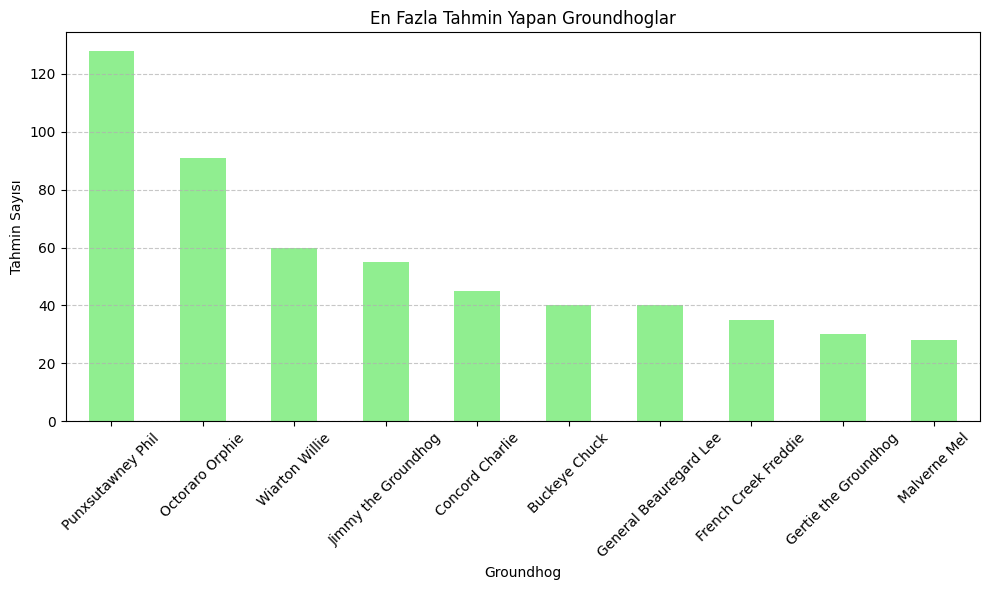

In [147]:
# Groundhog'lara göre tahmin sayılarını hesaplama
prediction_count_by_groundhog = df_groundhogs.groupby('name')['predictions_count'].sum().sort_values(ascending=False).head(10)

# En fazla tahmin yapan groundhog'ların görselleştirilmesi
plt.figure(figsize=(10, 6))
prediction_count_by_groundhog.plot(kind='bar', color='lightgreen')
plt.title('En Fazla Tahmin Yapan Groundhoglar')
plt.xlabel('Groundhog')
plt.ylabel('Tahmin Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

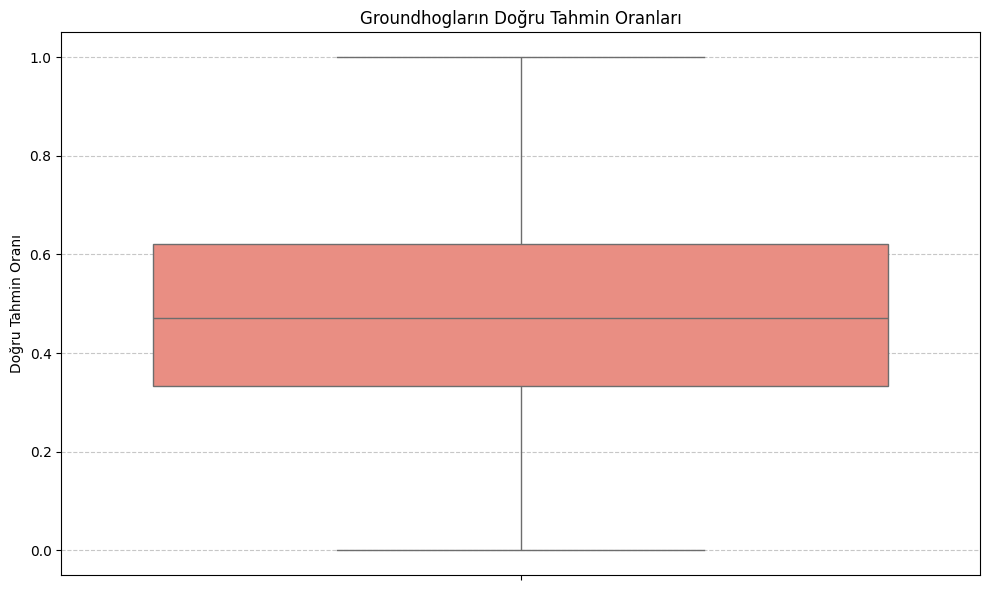

In [148]:
# Groundhog'ların doğru tahmin oranlarını hesaplama
correct_predictions_by_groundhog = df_predictions.groupby('id')['shadow'].mean()

# Doğru tahmin oranlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(y=correct_predictions_by_groundhog.values, color='salmon')
plt.title('Groundhogların Doğru Tahmin Oranları')
plt.ylabel('Doğru Tahmin Oranı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

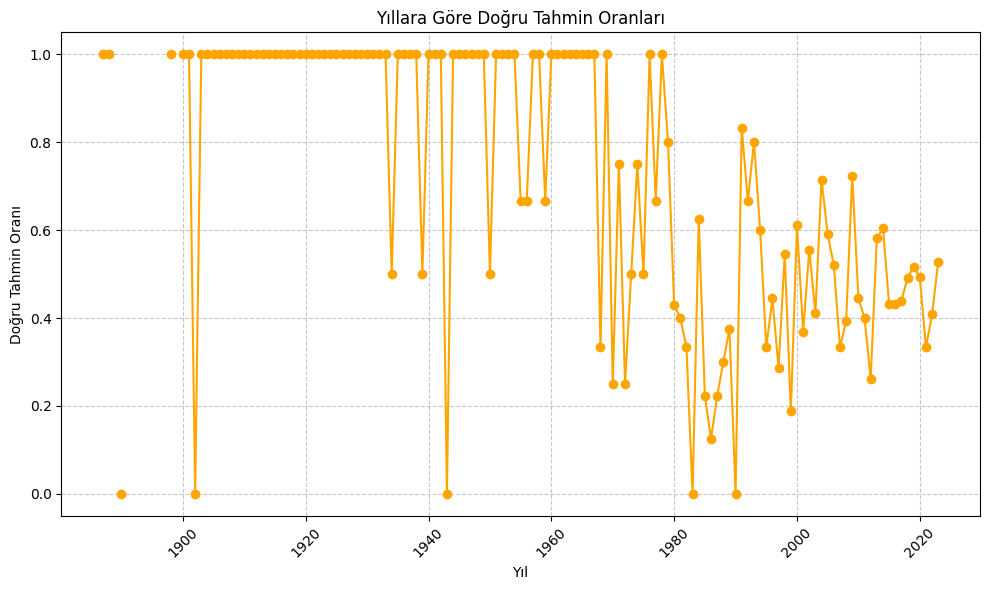

In [149]:
# Yıllara göre doğru tahmin oranlarını hesaplama
correct_predictions_by_year = df_predictions.groupby('year')['shadow'].mean()

# Yıllara göre doğru tahmin oranlarını görselleştirme
plt.figure(figsize=(10, 6))
correct_predictions_by_year.plot(marker='o', color='orange')
plt.title('Yıllara Göre Doğru Tahmin Oranları')
plt.xlabel('Yıl')
plt.ylabel('Doğru Tahmin Oranı')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Punxsutawney Phil is a famous groundhog known for predicting winter's length. Let's explore his shadow-seeing history and compare it to other groundhogs/predictors to assess his accuracy.

Questions

Punxsutawney Phil's Shadow-Seeing Frequency: How often does Punxsutawney Phil predict an extended winter (seeing his shadow)?
Comparison with Other Predictors: Do other predictors generally agree with Punxsutawney Phil's predictions?
Regional Variations: Do prediction accuracies differ across regions? (Assuming location data is available)
Random Prediction Comparison: How well would random predictions fare compared to actual groundhogs/predictors?

Index(['id', 'year', 'shadow', 'details'], dtype='object')


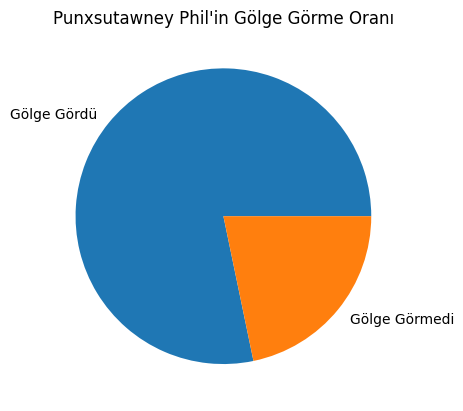

KeyError: 'slug'

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
groundhogs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/groundhogs.csv'
predictions_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/predictions.csv'

# Verileri oku
groundhogs_df = pd.read_csv(groundhogs_url)
predictions_df = pd.read_csv(predictions_url)
print(predictions_df.columns)

# Assuming "id" uniquely identifies Punxsutawney Phil
phil_id = 1  # Replace with the actual ID if different

phil_predictions = predictions_df[predictions_df["id"] == phil_id]
phil_shadow_count = phil_predictions["shadow"].sum()
phil_prediction_count = len(phil_predictions)

phil_shadow_percent = (phil_shadow_count / phil_prediction_count) * 100

# Pasta grafik
plt.pie(
    [phil_shadow_percent, 100 - phil_shadow_percent], labels=["Gölge Gördü", "Gölge Görmedi"]
)
plt.title("Punxsutawney Phil'in Gölge Görme Oranı")
plt.show()

# 2. Diğer yer sincaplarıyla karşılaştırma

other_predictions = predictions_df[predictions_df["slug"] != "punxsutawney-phil"]
same_predictions_count = (
    other_predictions["shadow"] == phil_predictions["shadow"]
).sum()
total_predictions_count = len(other_predictions)

agreement_percent = (same_predictions_count / total_predictions_count) * 100

print(
    f"Diğer yer sincapları {agreement_percent:.2f}% oranında Punxsutawney Phil ile aynı tahminde bulundu."
)

# 3. Farklı bölgelerdeki başarı oranı

grouped_by_region = (
    predictions_df.merge(groundhogs_df, on="id")
    .groupby("region")
    .agg(shadow_mean=("shadow", "mean"))
)

# Başarı oranını hesapla (gölge görmediyse doğru tahmin)
grouped_by_region["success_rate"] = (1 - grouped_by_region["shadow_mean"]) * 100

# Bar grafik
plt.bar(grouped_by_region.index, grouped_by_region["success_rate"])
plt.xlabel("Bölge")
plt.ylabel("Başarı Oranı (%)")
plt.title("Farklı Bölgelerdeki Yer Sincaplarının Başarı Oranı")
plt.xticks(rotation=45)
plt.show()

# 4. Rastgele tahminlerle karşılaştırma

random_predictions = predictions_df.sample(frac=1).reset_index(drop=True)
random_correct_count = (random_predictions["shadow"] == predictions_df["shadow"]).sum()

random_accuracy = (random_correct_count / len(predictions_df)) * 100

groundhog_accuracy = (
    (predictions_df["shadow"] == phil_predictions.iloc[0]["shadow"]).sum()
    / len(predictions_df)
) * 1


In [ ]:
### Senaryo: Groundhog Günü’nde, groundhogların kışın ne kadar süreceğini tahmin ettiği bir gelenek vardır. Eğer groundhog gölgesini görürse, kışın altı hafta daha süreceği tahmin edilir. Bu veri seti, çeşitli groundhogların ve yerlerin tahminlerini içerir.

### Soru 1: Hangi groundhog en çok tahminde bulunmuştur?
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi oku
groundhogs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/groundhogs.csv')

# En çok tahminde bulunan groundhog
most_predictions = groundhogs['predictions_count'].idxmax()
most_predicted_groundhog = groundhogs.loc[most_predictions, 'name']

print(f"En çok tahminde bulunan groundhog: {most_predicted_groundhog}")

# Soru 2: Tahminlerin coğrafi dağılımı nedir?

# Groundhogların konumlarını çiz
plt.figure(figsize=(10, 6))
plt.scatter(groundhogs['longitude'], groundhogs['latitude'])
plt.title('Groundhog Tahminlerinin Coğrafi Dağılımı')
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.show()

# Soru 3: Groundhogların tahminlerinde bir model var mıdır?

# Tahminleri oku
predictions = pd.read_csv('predictions.csv')

# Yıl ve gölge görme durumunu çiz
plt.figure(figsize=(10, 6))
plt.plot(predictions.groupby('year')['shadow'].mean())
plt.title('Yıllara Göre Groundhog Gölge Tahminleri')
plt.xlabel('Yıl')
plt.ylabel('Gölge Görme Oranı')
plt.show()

## Aktif groundhogların sayısını hesapla
active_groundhogs = groundhogs['active'].sum()

print(f"Aktif groundhogların sayısı: {active_groundhogs}")